<a href="https://colab.research.google.com/github/ShashwatTiwari79/AI-in-Innovation-trend-mapper/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load CSV files
train_df = pd.read_csv("train.csv", header=None, names=["label", "title", "description"])
test_df  = pd.read_csv("test.csv", header=None, names=["label", "title", "description"])

# Merge train + test
df = pd.concat([train_df, test_df], ignore_index=True)

# Keep only necessary columns
df = df[["label", "title", "description"]]

# Optional: Sample 50,000 rows for manageability
df = df.sample(50000, random_state=42)

print(df.head())


      label                                              title  \
73066     1                  US downplays Iraq explosives loss   
61893     2  Busch Remains the Man to Beat in the Race for ...   
41175     1                               The Tragedy of Sudan   
61162     4                   Salmond in fishing policy demand   
52171     3            Genentech Quarterly Profit Up (Reuters)   

                                             description  
73066  The US is playing down the significance of a U...  
61893  With drivers like Jeff Gordon, Dale Earnhardt ...  
41175  Fifty thousand are dead, thousands more will d...  
61162  Alex Salmond is to deliver a petition calling ...  
52171  Reuters - Genentech Inc.  on Wednesday\said th...  


In [2]:
# Install spaCy if not already installed
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
opencv-contrib-pytho

/usr/local/lib/python3.12/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [4]:
def preprocess(text):
    doc = nlp(str(text))
    tokens = [token.lemma_.lower() for token in doc
              if not token.is_stop and token.is_alpha]
    return " ".join(tokens)


In [5]:
# Combine title and description
df["text"] = df["title"] + " " + df["description"]

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess)

print(df[["title", "clean_text"]].head())


                                                   title  \
73066                  US downplays Iraq explosives loss   
61893  Busch Remains the Man to Beat in the Race for ...   
41175                               The Tragedy of Sudan   
61162                   Salmond in fishing policy demand   
52171            Genentech Quarterly Profit Up (Reuters)   

                                              clean_text  
73066  downplay iraq explosive loss play significance...  
61893  busch remain man beat race nascar nextel cup d...  
41175  tragedy sudan thousand dead thousand die milli...  
61162  salmond fishing policy demand alex salmond del...  
52171  genentech quarterly profit reuters reuters gen...  


In [6]:
df.to_csv("ag_news_50k_clean.csv", index=False)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use top 5000 keywords
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X_tfidf = vectorizer.fit_transform(df["clean_text"])

# Optional: Convert to DataFrame to inspect
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())


   aaron  abandon  abbas  abbey  abc  abduct  abdullah  ability  able  aboard  \
0    0.0      0.0    0.0    0.0  0.0     0.0       0.0      0.0   0.0     0.0   
1    0.0      0.0    0.0    0.0  0.0     0.0       0.0      0.0   0.0     0.0   
2    0.0      0.0    0.0    0.0  0.0     0.0       0.0      0.0   0.0     0.0   
3    0.0      0.0    0.0    0.0  0.0     0.0       0.0      0.0   0.0     0.0   
4    0.0      0.0    0.0    0.0  0.0     0.0       0.0      0.0   0.0     0.0   

   ...  yushchenko  zarqawi  zealand  zero  ziff  zimbabwe  zone  zoo  zook  \
0  ...         0.0      0.0      0.0   0.0   0.0       0.0   0.0  0.0   0.0   
1  ...         0.0      0.0      0.0   0.0   0.0       0.0   0.0  0.0   0.0   
2  ...         0.0      0.0      0.0   0.0   0.0       0.0   0.0  0.0   0.0   
3  ...         0.0      0.0      0.0   0.0   0.0       0.0   0.0  0.0   0.0   
4  ...         0.0      0.0      0.0   0.0   0.0       0.0   0.0  0.0   0.0   

   zurich  
0     0.0  
1     0.0  
2 

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

df["entities"] = df["text"].apply(extract_entities)
print(df[["text", "entities"]].head())


                                                    text  \
73066  US downplays Iraq explosives loss The US is pl...   
61893  Busch Remains the Man to Beat in the Race for ...   
41175  The Tragedy of Sudan Fifty thousand are dead, ...   
61162  Salmond in fishing policy demand Alex Salmond ...   
52171  Genentech Quarterly Profit Up (Reuters) Reuter...   

                                                entities  
73066  [US, Iraq, US, UN, almost 350 metric tons, Iraqi]  
61893  [Busch Remains, the Man to Beat, #39;s Nextel ...  
41175  [The Tragedy of, Fifty thousand, thousands, mo...  
61162    [Alex Salmond, UK, the Common Fisheries Policy]  
52171  [Genentech, Reuters, Reuters - Genentech Inc.,...  


In [9]:
pip install gensim

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

In [10]:
from gensim import corpora, models

# Prepare texts for LDA (list of token lists)
texts = [doc.split() for doc in df["clean_text"]]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.014*"ap" + 0.012*"game" + 0.011*"win" + 0.008*"season" + 0.007*"team" + 0.007*"year" + 0.007*"new" + 0.006*"night" + 0.005*"lead" + 0.005*"run"
Topic 1: 0.017*"say" + 0.009*"iraq" + 0.008*"reuters" + 0.008*"president" + 0.008*"ap" + 0.008*"kill" + 0.006*"official" + 0.006*"minister" + 0.005*"election" + 0.005*"bush"
Topic 2: 0.008*"world" + 0.008*"cup" + 0.008*"new" + 0.007*"mobile" + 0.007*"ibm" + 0.006*"phone" + 0.005*"open" + 0.005*"apple" + 0.005*"final" + 0.005*"intel"
Topic 3: 0.015*"say" + 0.014*"reuters" + 0.011*"oil" + 0.010*"price" + 0.010*"new" + 0.009*"company" + 0.007*"year" + 0.007*"rise" + 0.007*"million" + 0.007*"stock"
Topic 4: 0.014*"new" + 0.013*"microsoft" + 0.009*"service" + 0.009*"internet" + 0.009*"software" + 0.007*"company" + 0.007*"search" + 0.006*"google" + 0.006*"system" + 0.006*"web"


In [11]:
def get_dominant_topic(bow):
    topic_probs = lda_model.get_document_topics(bow)
    return max(topic_probs, key=lambda x: x[1])[0]

df["dominant_topic"] = [get_dominant_topic(b) for b in corpus]
print(df[["clean_text", "dominant_topic"]].head())


                                              clean_text  dominant_topic
73066  downplay iraq explosive loss play significance...               1
61893  busch remain man beat race nascar nextel cup d...               0
41175  tragedy sudan thousand dead thousand die milli...               1
61162  salmond fishing policy demand alex salmond del...               4
52171  genentech quarterly profit reuters reuters gen...               3


Accuracy: 0.8983

Classification Report:

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      5956
           2       0.94      0.97      0.95      6058
           3       0.87      0.87      0.87      5911
           4       0.88      0.87      0.87      6075

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



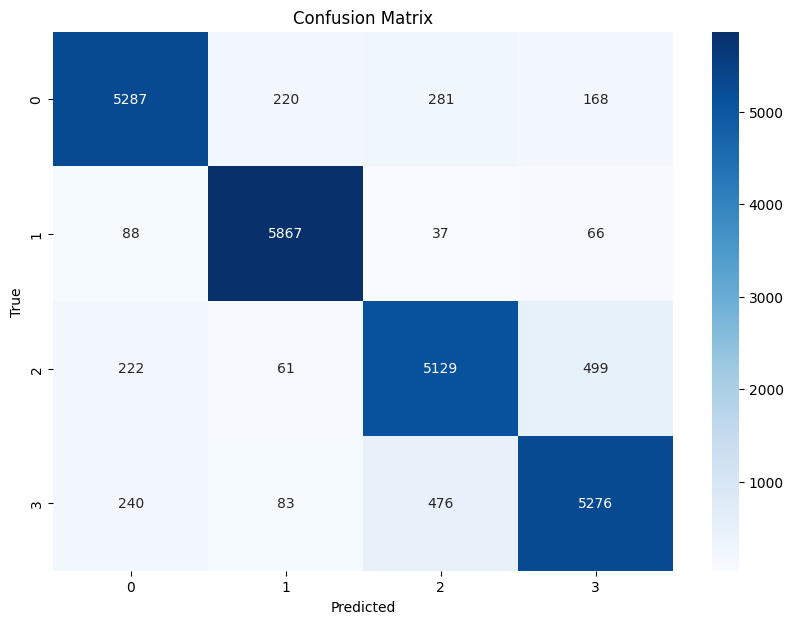

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("train.csv")   # adjust file name if different
df = df.dropna(subset=["Description"])  # drop missing text

# 2. Split data
X_train, X_val, y_train, y_val = train_test_split(
    df["Description"], df["Class Index"], test_size=0.2, random_state=42
)

# 3. Vectorize text
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# 4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 5. Predict on validation
y_pred = model.predict(X_val_tfidf)

# 6. Evaluate
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


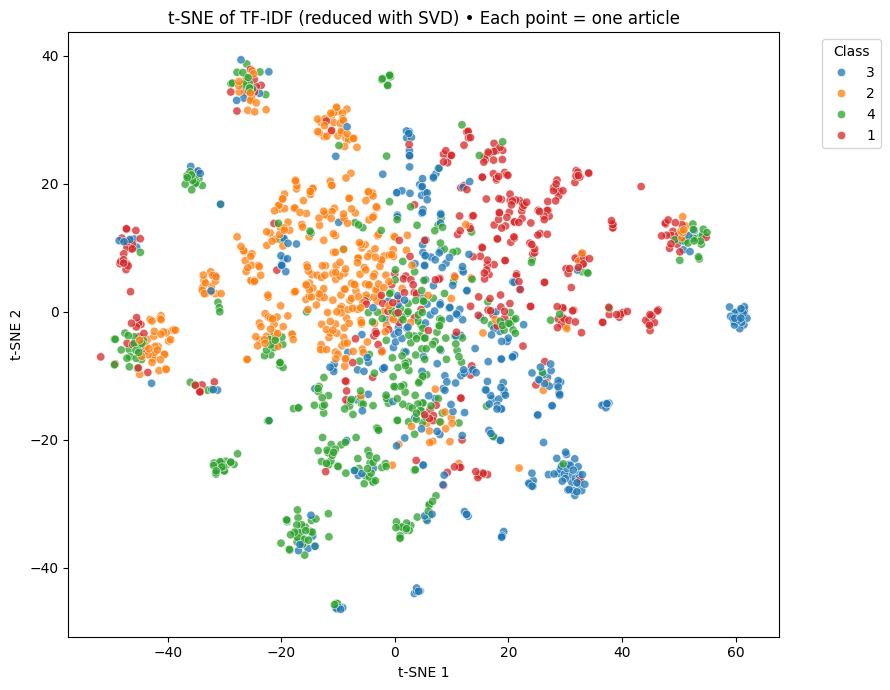

In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# ---- 1) Ensure columns exist & normalize names ----
# If you've just reloaded the CSV:
# df = pd.read_csv("train.csv")  # or your combined file

# Create a unified label column
if "label" not in df.columns:
    if "Class Index" in df.columns:
        df = df.rename(columns={"Class Index": "label"})
    else:
        raise KeyError("No label column found. Expected 'Class Index' or 'label'.")

# Create a unified text column (Title + Description)
if "text" not in df.columns:
    title_col = "Title" if "Title" in df.columns else ("title" if "title" in df.columns else None)
    desc_col  = "Description" if "Description" in df.columns else ("description" if "description" in df.columns else None)
    if desc_col is None:
        raise KeyError("No description column found. Expected 'Description' or 'description'.")
    if title_col is None:
        df["text"] = df[desc_col].fillna("")
    else:
        df["text"] = df[title_col].fillna("") + " " + df[desc_col].fillna("")

# ---- 2) Recreate clean_text if missing ----
if "clean_text" not in df.columns:
    def basic_clean(s):
        s = str(s).lower()
        s = re.sub(r"[^a-z\s]", " ", s)
        s = re.sub(r"\s+", " ", s).strip()
        return s
    df["clean_text"] = df["text"].apply(basic_clean)

# ---- 3) Sample a manageable subset for t-SNE ----
# t-SNE is O(n^2); keep it small (e.g., 1500 points)
n_samples = min(1500, len(df))
subset = df.sample(n_samples, random_state=42).reset_index(drop=True)

# ---- 4) TF-IDF -> SVD(=PCA for sparse) -> t-SNE ----
vectorizer = TfidfVectorizer(max_features=3000, stop_words="english")
X_tfidf = vectorizer.fit_transform(subset["clean_text"])

# Reduce to 50 dims to make t-SNE faster/stabler
svd = TruncatedSVD(n_components=50, random_state=42)
X_50 = svd.fit_transform(X_tfidf)

# t-SNE (set perplexity based on sample size)
perp = max(5, min(40, n_samples // 50))
tsne = TSNE(n_components=2, init="pca", learning_rate="auto",
            perplexity=perp, random_state=42)
tsne_2d = tsne.fit_transform(X_50)

# ---- 5) Plot ----
plot_df = pd.DataFrame({
    "x": tsne_2d[:, 0],
    "y": tsne_2d[:, 1],
    "label": subset["label"].astype(str)
})

plt.figure(figsize=(9,7))
sns.scatterplot(data=plot_df, x="x", y="y", hue="label", alpha=0.75)
plt.title("t-SNE of TF-IDF (reduced with SVD) • Each point = one article")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


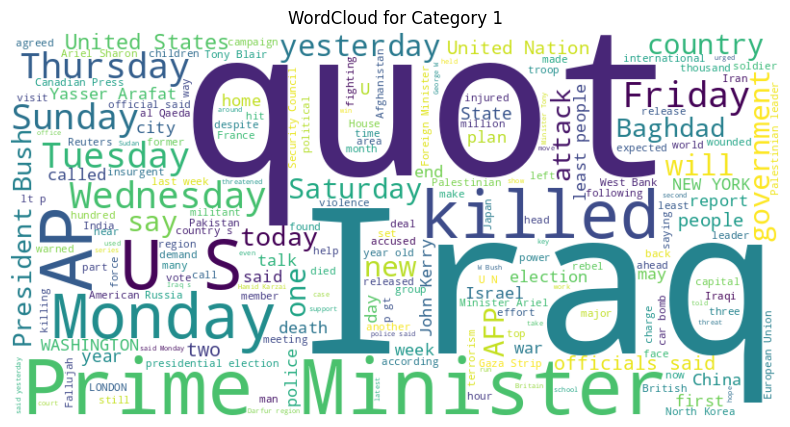

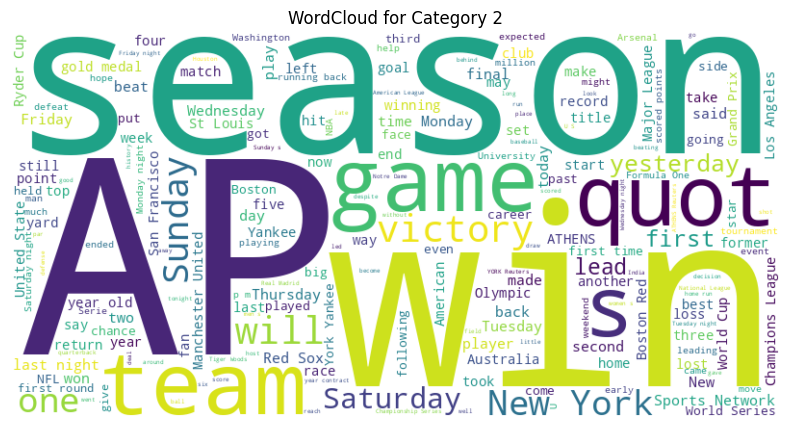

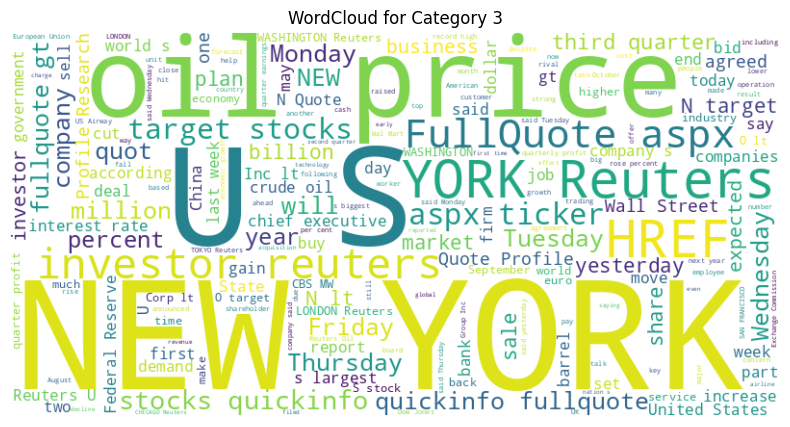

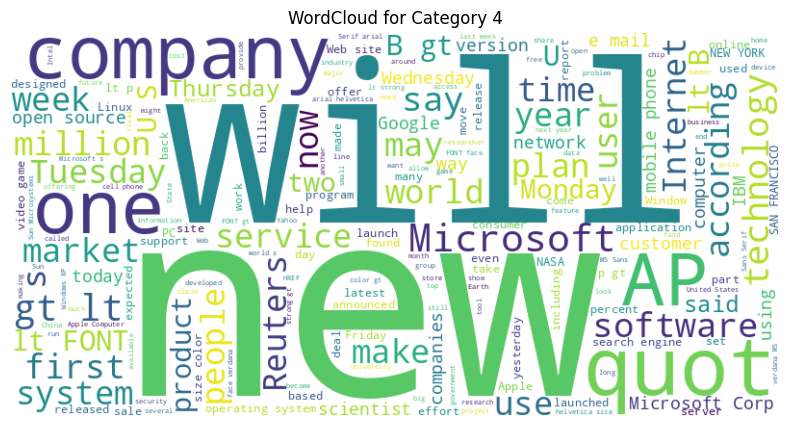

In [15]:
from wordcloud import WordCloud

# Combine all descriptions per category
category_texts = df.groupby("Class Index")["Description"].apply(lambda x: " ".join(x))

for cat, text in category_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Category {cat}")
    plt.show()


In [16]:
# Top Features per Class (from Logistic Regression)
import numpy as np

feature_names = np.array(tfidf.get_feature_names_out())

for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(model.coef_[i])[-10:]   # top 10 words
    print(f"Class {class_label}: {feature_names[top10]}")


Class 1: ['arafat' 'darfur' 'president' 'afghanistan' 'military' 'baghdad' 'iraqi'
 'nuclear' 'iraq' 'afp']
Class 2: ['teams' 'olympic' 'season' 'cricket' 'baseball' 'team' 'league' 'sports'
 'coach' 'cup']
Class 3: ['tax' 'forbes' 'amp' 'economic' 'oil' 'economy' 'airlines' 'bank'
 'fullquote' 'hellip']
Class 4: ['online' 'linux' 'web' 'apple' 'microsoft' 'software' 'scientists'
 'internet' 'space' 'nasa']


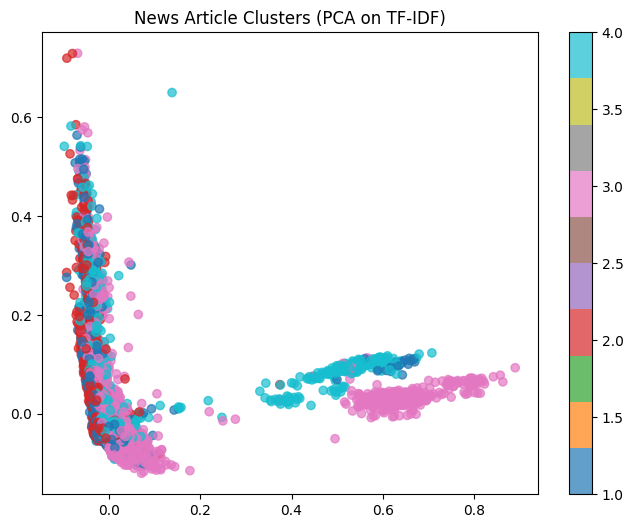

In [17]:
from sklearn.decomposition import PCA

X_vis = PCA(n_components=2).fit_transform(X_val_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_val, cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("News Article Clusters (PCA on TF-IDF)")
plt.show()


In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# 1. Load test data
test_df = pd.read_csv("test.csv")

# 2. Drop rows with missing descriptions
test_df = test_df.dropna(subset=["Description"])

# 3. Transform text using the SAME vectorizer (do not fit again!)
X_test_tfidf = tfidf.transform(test_df["Description"])

# 4. Predict
y_test_pred = model.predict(X_test_tfidf)

# 5. Evaluate
y_test = test_df["Class Index"]
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.8964473684210527

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.94      0.97      0.95      1900
           3       0.86      0.86      0.86      1900
           4       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [20]:
# 1. Load test data
test_df = pd.read_csv("test.csv")

# 2. Drop rows with missing descriptions
test_df = test_df.dropna(subset=["Description"])

# 3. Transform using same vectorizer
X_test_tfidf = tfidf.transform(test_df["Description"])

# 4. Predict
y_test_pred = model.predict(X_test_tfidf)

# 5. Save results
test_df["Predicted_Class"] = y_test_pred
test_df.to_csv("test_with_predictions.csv", index=False)

print("✅ Predictions saved to test_with_predictions.csv")


✅ Predictions saved to test_with_predictions.csv


In [22]:
# Example mapping (adjust based on your dataset labels)
category_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

def predict_article(text):
    X_tfidf = tfidf.transform([text])
    pred = model.predict(X_tfidf)[0]
    return category_map.get(pred, pred)  # return readable name if exists


In [23]:
sample_text = "NASA prepares to launch new space telescope for deep universe exploration"
print("Predicted Category:", predict_article(sample_text))


Predicted Category: Sci/Tech


In [24]:
import joblib

# Save trained model
joblib.dump(model, "news_classifier.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved!")


Model and vectorizer saved!


In [25]:
import joblib

# Load model and vectorizer
model = joblib.load("news_classifier.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

def predict_article(text):
    X_tfidf = tfidf.transform([text])
    pred = model.predict(X_tfidf)[0]
    return pred


In [26]:
category_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

def predict_article(text):
    X_tfidf = tfidf.transform([text])
    pred = model.predict(X_tfidf)[0]
    return category_map.get(pred, pred)
